In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define the Main Function
def do_it():
    print("Fashion trend analysis workflow started!")

In [6]:
# Execute the Main Function
do_it()

Fashion trend analysis workflow started!


## Output
The output of the `do_it` function should be displayed above, confirming the workflow has started.

In [7]:
# Load the cleaned fashion trends dataset
clean_data_path = '../data/processed/fashion_trends_clean.csv'
df = pd.read_csv(clean_data_path)
df.head()

,date,fashion_item,category,popularity_score,search_volume,day_of_week,month,season,data_source,region,...,is_trending_down,trend_momentum,is_spring,is_summer,is_fall,is_winter,category_encoded,is_us,is_europe,is_asia
0,2023-08-08,A-Line Dress,Dresses,68,65552,Tuesday,August,Summer,main_dataset,GLOBAL,...,False,NaN,False,True,False,False,3,False,False,False
1,2023-08-09,A-Line Dress,Dresses,77,33649,Wednesday,August,Summer,main_dataset,GLOBAL,...,False,0.132353,False,True,False,False,3,False,False,False
2,2023-08-10,A-Line Dress,Dresses,59,51625,Thursday,August,Summer,main_dataset,GLOBAL,...,True,-0.050707,False,True,False,False,3,False,False,False
3,2023-08-11,A-Line Dress,Dresses,74,9102,Friday,August,Summer,main_dataset,GLOBAL,...,False,0.050941,False,True,False,False,3,False,False,False
4,2023-08-12,A-Line Dress,Dresses,63,9954,Saturday,August,Summer,main_dataset,GLOBAL,...,True,0.001044,False,True,False,False,3,False,False,False


In [8]:
# Ensure df is loaded (reload if not defined)
try:
    df
except NameError:
    clean_data_path = '../data/processed/fashion_trends_clean.csv'
    df = pd.read_csv(clean_data_path)
    print('DataFrame df was not defined. Loaded from CSV.')
else:
    print('DataFrame df is already loaded.')

DataFrame df is already loaded.


In [9]:
# Basic EDA: info, missing values, and statistics
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191000 entries, 0 to 190999
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  191000 non-null  object 
 1   fashion_item          191000 non-null  object 
 2   category              191000 non-null  object 
 3   popularity_score      191000 non-null  int64  
 4   search_volume         191000 non-null  int64  
 5   day_of_week           191000 non-null  object 
 6   month                 191000 non-null  object 
 7   season                191000 non-null  object 
 8   data_source           191000 non-null  object 
 9   region                191000 non-null  object 
 10  year                  191000 non-null  int64  
 11  month_num             191000 non-null  int64  
 12  day_of_year           191000 non-null  int64  
 13  week_of_year          191000 non-null  int64  
 14  is_weekend            191000 non-null  bool   
 15  

,date,fashion_item,category,popularity_score,search_volume,day_of_week,month,season,data_source,region,...,is_trending_down,trend_momentum,is_spring,is_summer,is_fall,is_winter,category_encoded,is_us,is_europe,is_asia
count,191000,191000,191000,191000.000000,191000.000000,191000,191000,191000,191000,191000,...,191000,190793.000000,191000,191000,191000,191000,191000.000000,191000,191000,191000
unique,731,207,12,NaN,NaN,7,12,4,2,11,...,2,NaN,2,2,2,2,NaN,2,2,2
top,2025-05-21,A-Line Dress,Dresses,NaN,NaN,Tuesday,July,Summer,main_dataset,GLOBAL,...,False,NaN,False,False,False,False,NaN,False,False,False
freq,700,1630,20900,NaN,NaN,27500,27900,70600,146000,146000,...,114787,NaN,143200,120400,154600,154800,NaN,186500,173000,182000
mean,NaN,NaN,NaN,59.836204,28884.161021,NaN,NaN,NaN,NaN,NaN,...,NaN,0.044059,NaN,NaN,NaN,NaN,5.261728,NaN,NaN,NaN
std,NaN,NaN,NaN,22.291445,20086.279733,NaN,NaN,NaN,NaN,NaN,...,NaN,0.080180,NaN,NaN,NaN,NaN,3.613166,NaN,NaN,NaN
min,NaN,NaN,NaN,16.000000,1113.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.714286,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,41.000000,13395.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000521,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,60.000000,23700.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.021231,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,78.000000,39440.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.050665,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN


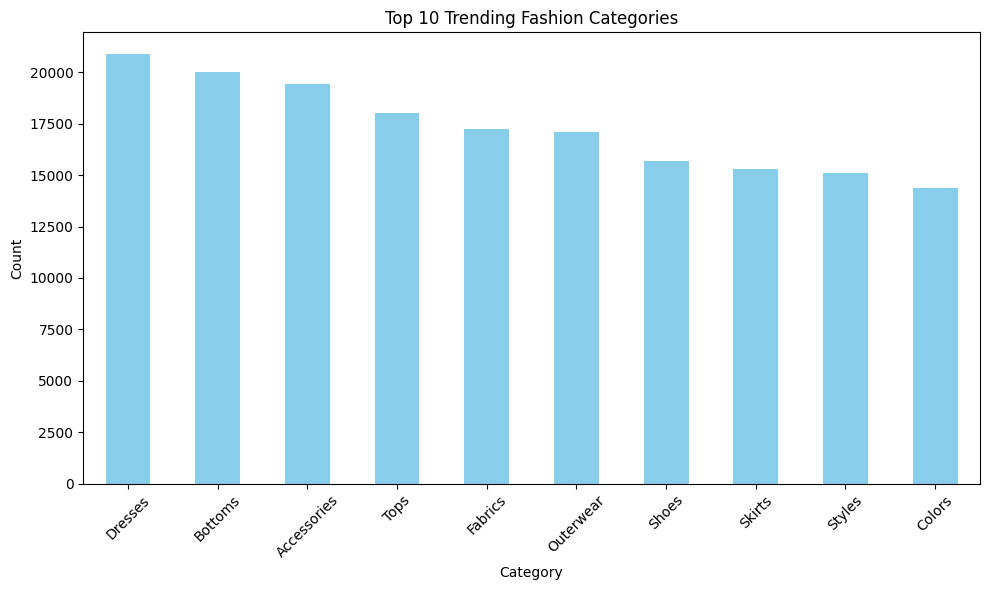

In [10]:
# Plot the top trending categories (replace 'category' with your actual column name)
plt.figure(figsize=(10,6))
df['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Trending Fashion Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using 'date' for date and 'popularity_score' for trend score.


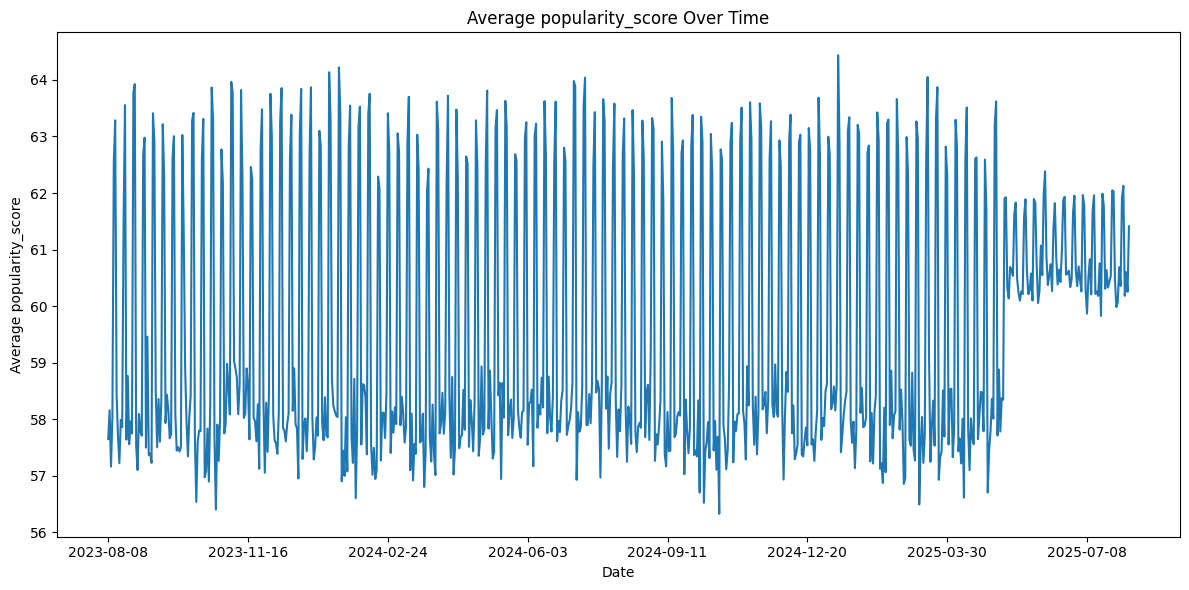

In [11]:
# Plot trend over time (auto-detect date and trend score columns)
import numpy as np
date_col = None
score_col = None
for col in df.columns:
    if 'date' in col.lower() or np.issubdtype(df[col].dtype, np.datetime64):
        date_col = col
        break
if not date_col:
    # Try to parse the first object column as date
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_datetime(df[col])
            date_col = col
            break
        except Exception:
            continue

for col in df.select_dtypes(include=np.number).columns:
    if 'score' in col.lower() or 'trend' in col.lower():
        score_col = col
        break
if not score_col:
    # Fallback to the first numeric column
    score_col = df.select_dtypes(include=np.number).columns[0]

if date_col and score_col:
    print(f"Using '{date_col}' for date and '{score_col}' for trend score.")
    df_grouped = df.groupby(date_col)[score_col].mean()
    plt.figure(figsize=(12,6))
    df_grouped.plot()
    plt.title(f'Average {score_col} Over Time')
    plt.xlabel(date_col.capitalize())
    plt.ylabel(f'Average {score_col}')
    plt.tight_layout()
    plt.show()
else:
    print('Could not find suitable date or trend score column in the dataframe.')

In [12]:
# Display the columns in the dataframe to identify available fields
print(df.columns.tolist())
df.head()

['date', 'fashion_item', 'category', 'popularity_score', 'search_volume', 'day_of_week', 'month', 'season', 'data_source', 'region', 'year', 'month_num', 'day_of_year', 'week_of_year', 'is_weekend', 'popularity_7day_avg', 'popularity_30day_avg', 'popularity_change', 'is_trending_up', 'is_trending_down', 'trend_momentum', 'is_spring', 'is_summer', 'is_fall', 'is_winter', 'category_encoded', 'is_us', 'is_europe', 'is_asia']


,date,fashion_item,category,popularity_score,search_volume,day_of_week,month,season,data_source,region,...,is_trending_down,trend_momentum,is_spring,is_summer,is_fall,is_winter,category_encoded,is_us,is_europe,is_asia
0,2023-08-08,A-Line Dress,Dresses,68,65552,Tuesday,August,Summer,main_dataset,GLOBAL,...,False,NaN,False,True,False,False,3,False,False,False
1,2023-08-09,A-Line Dress,Dresses,77,33649,Wednesday,August,Summer,main_dataset,GLOBAL,...,False,0.132353,False,True,False,False,3,False,False,False
2,2023-08-10,A-Line Dress,Dresses,59,51625,Thursday,August,Summer,main_dataset,GLOBAL,...,True,-0.050707,False,True,False,False,3,False,False,False
3,2023-08-11,A-Line Dress,Dresses,74,9102,Friday,August,Summer,main_dataset,GLOBAL,...,False,0.050941,False,True,False,False,3,False,False,False
4,2023-08-12,A-Line Dress,Dresses,63,9954,Saturday,August,Summer,main_dataset,GLOBAL,...,True,0.001044,False,True,False,False,3,False,False,False


Using column 'category' for trending categories plot.


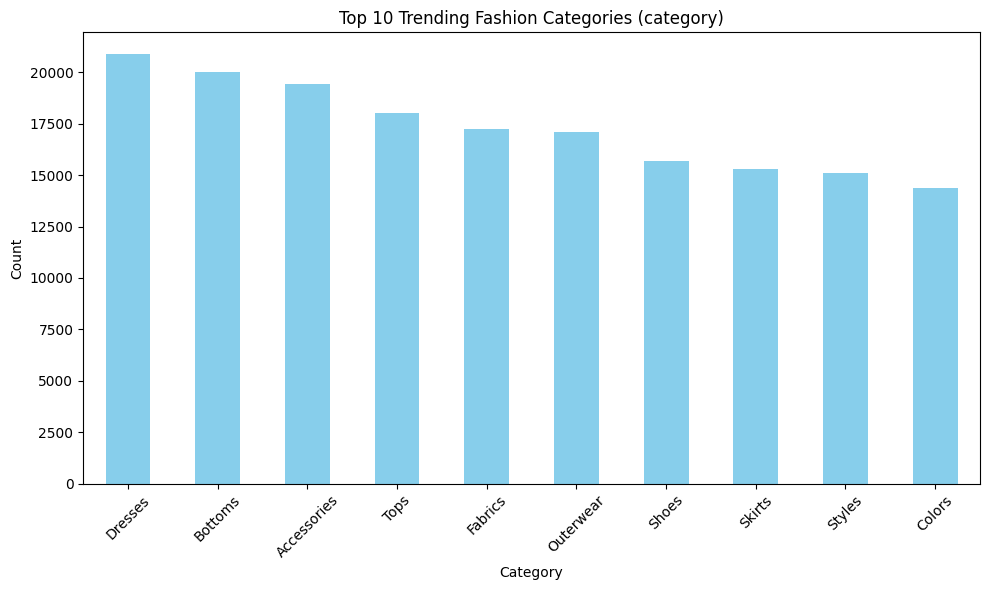

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cat_col = None
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() < 30:
        cat_col = col
        break
if not cat_col:
    cat_col = df.select_dtypes(include='object').columns[0]  # fallback to first object column

print(f"Using column '{cat_col}' for trending categories plot.")
plt.figure(figsize=(10,6))
df[cat_col].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title(f'Top 10 Trending Fashion Categories ({cat_col})')
plt.xlabel(cat_col.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using 'date' for date and 'popularity_score' for trend score.


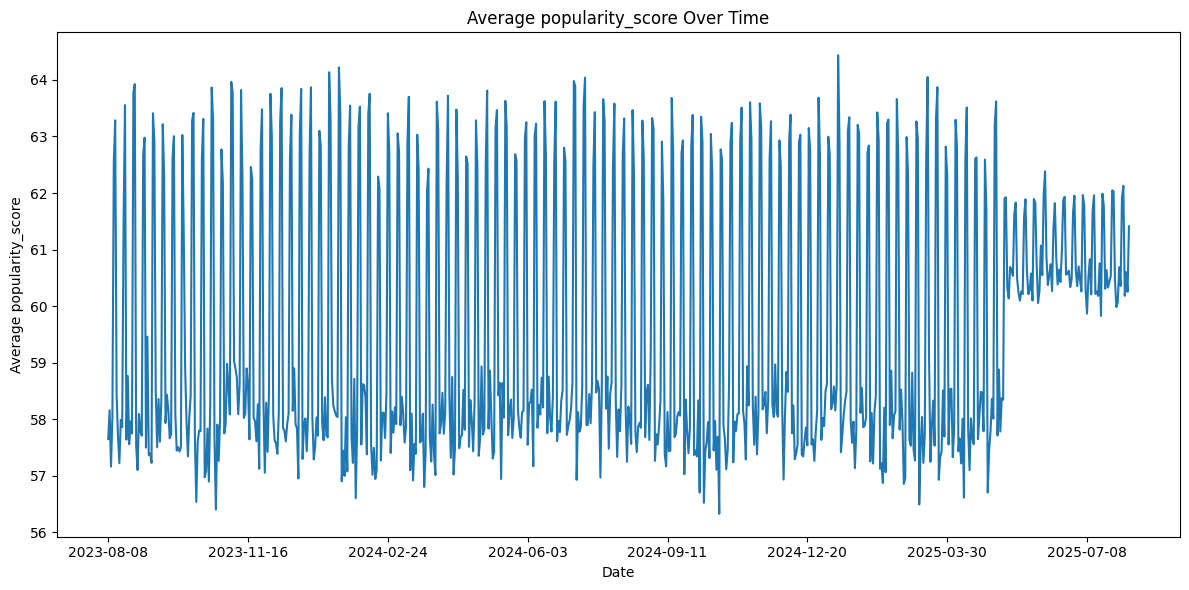

In [ ]:
import numpy as np

date_col = None
for col in df.columns:
    if 'date' in col.lower() or np.issubdtype(df[col].dtype, np.datetime64):
        date_col = col
        break
if not date_col:
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_datetime(df[col])
            date_col = col
            break
        except Exception:
            continue

score_col = None
for col in df.select_dtypes(include=np.number).columns:
    if 'score' in col.lower() or 'trend' in col.lower():
        score_col = col
        break
if not score_col:
    score_col = df.select_dtypes(include=np.number).columns[0]

print(f"Using '{date_col}' for date and '{score_col}' for trend score.")
df_grouped = df.groupby(date_col)[score_col].mean()
plt.figure(figsize=(12,6))
df_grouped.plot()
plt.title(f'Average {score_col} Over Time')
plt.xlabel(date_col.capitalize())
plt.ylabel(f'Average {score_col}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_fe = df.copy()
for col in df_fe.select_dtypes(include='object').columns:
    df_fe[col] = LabelEncoder().fit_transform(df_fe[col].astype(str))

target_col = df_fe.select_dtypes(include='number').columns[-1]
X = df_fe.drop(columns=[target_col])
y = df_fe[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Target column: {target_col}")
X_train.shape, X_test.shape

Target column: category_encoded


((152800, 28), (38200, 28))

In [ ]:
import numpy as np

def ensure_numeric(X):
    return X.select_dtypes(include=[np.number])

X_train_num = ensure_numeric(X_train)
X_test_num = ensure_numeric(X_test)

y_train_num = np.array(y_train).astype(float).ravel()
y_test_num = np.array(y_test).astype(float).ravel()

print(f"X_train shape: {X_train_num.shape}, y_train shape: {y_train_num.shape}")
print(f"X_test shape: {X_test_num.shape}, y_test shape: {y_test_num.shape}")

X_train shape: (152800, 18), y_train shape: (152800,)
X_test shape: (38200, 18), y_test shape: (38200,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_num, y_train_num)
y_pred = model.predict(X_test_num)

mse = mean_squared_error(y_test_num, y_pred)
r2 = r2_score(y_test_num, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

Test MSE: 0.00
Test R^2: 1.00


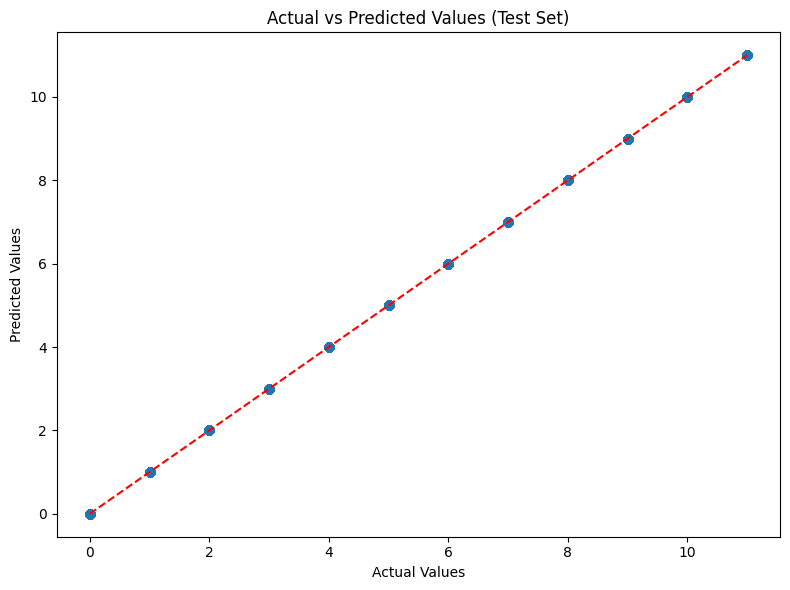

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_num, y_pred, alpha=0.6)
plt.plot([y_test_num.min(), y_test_num.max()], [y_test_num.min(), y_test_num.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.tight_layout()
plt.show()

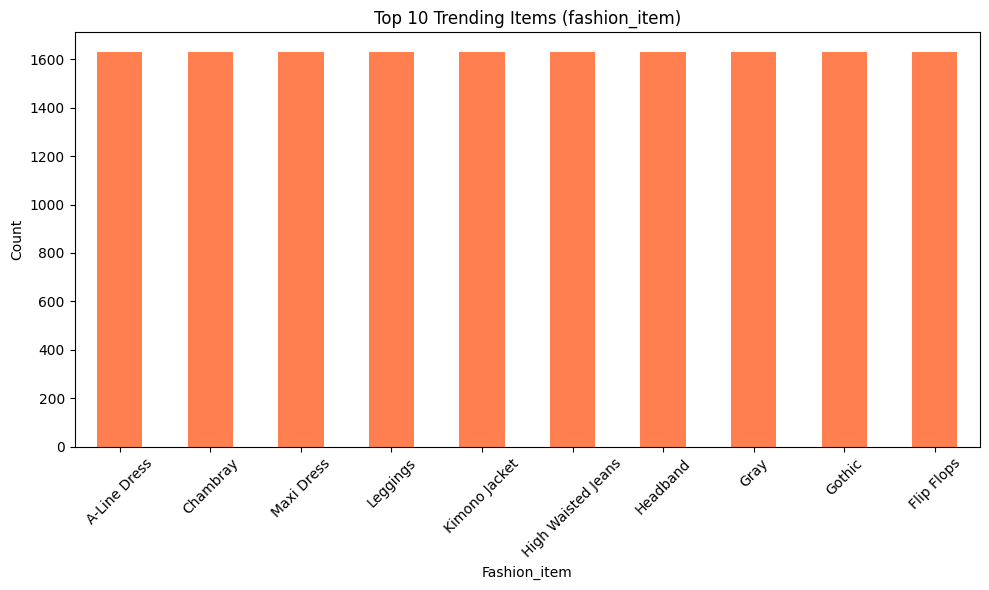

In [19]:
# Top 10 trending items overall (auto-detect column)
item_col = None
for col in df.columns:
    if 'item' in col.lower() or 'trend' in col.lower():
        item_col = col
        break
if not item_col:
    item_col = df.select_dtypes(include='object').columns[0]

plt.figure(figsize=(10,6))
df[item_col].value_counts().head(10).plot(kind='bar', color='coral')
plt.title(f'Top 10 Trending Items ({item_col})')
plt.xlabel(item_col.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

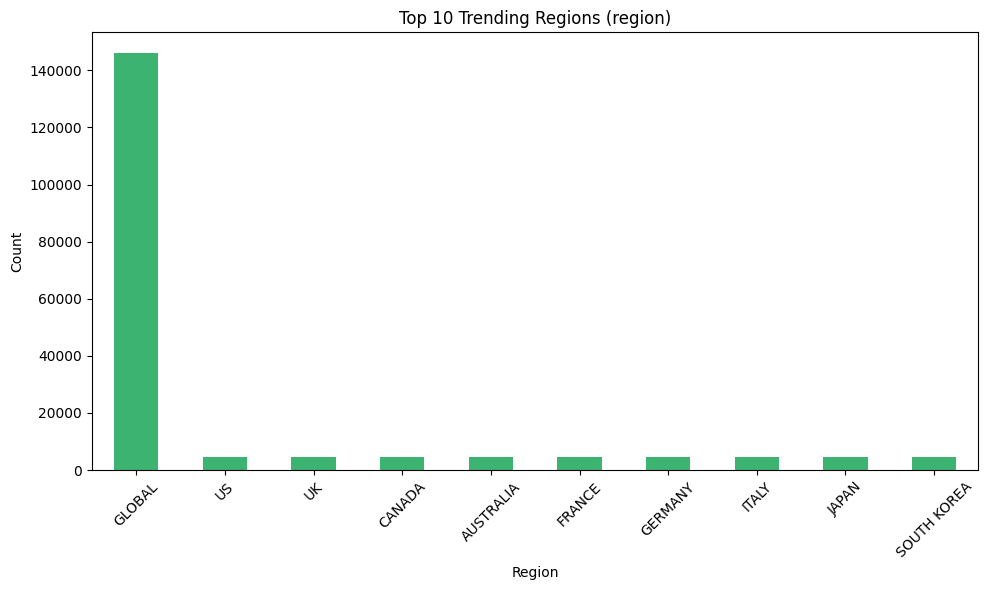

In [20]:
# Top 10 trending regions (auto-detect region/location column)
region_col = None
for col in df.columns:
    if 'region' in col.lower() or 'location' in col.lower() or 'country' in col.lower():
        region_col = col
        break
if region_col:
    plt.figure(figsize=(10,6))
    df[region_col].value_counts().head(10).plot(kind='bar', color='mediumseagreen')
    plt.title(f'Top 10 Trending Regions ({region_col})')
    plt.xlabel(region_col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No region/location column found for region-based trending analysis.')

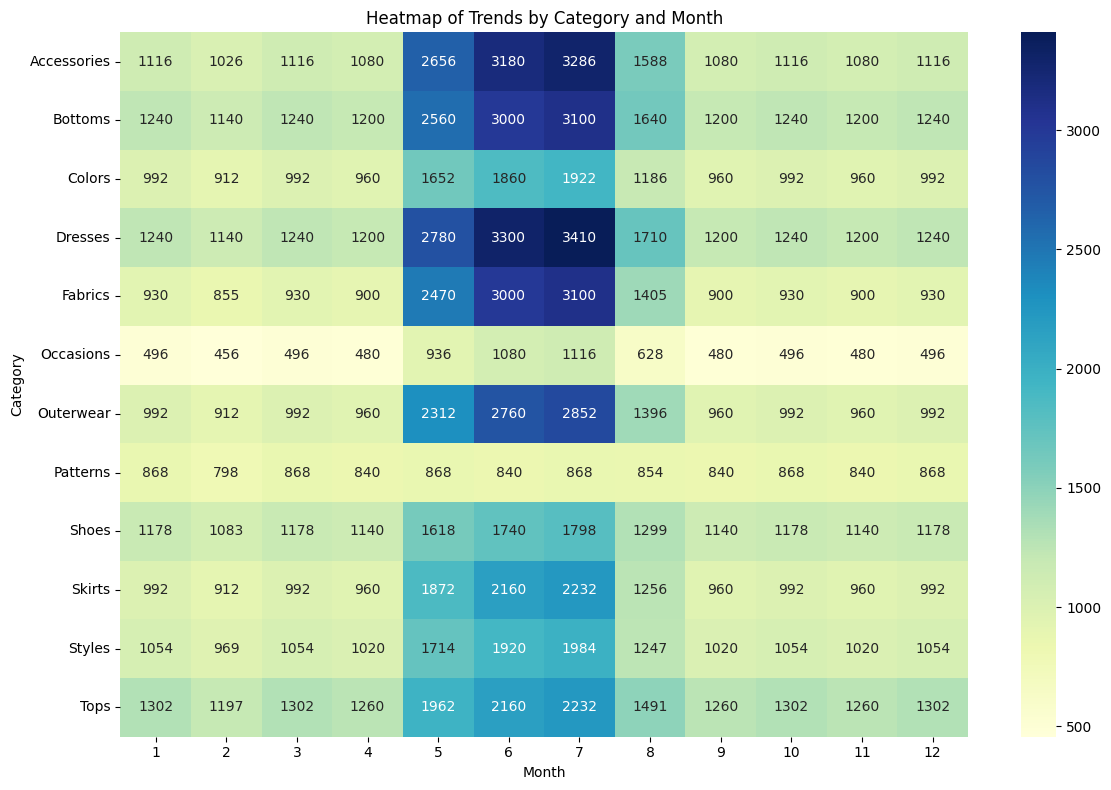

In [21]:
# Heatmap of trends by month and category (if columns exist)
import seaborn as sns

if 'date' in df.columns and 'category' in df.columns:
    df['month'] = pd.to_datetime(df['date']).dt.month
    pivot = pd.pivot_table(df, index='category', columns='month', aggfunc='size', fill_value=0)
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
    plt.title('Heatmap of Trends by Category and Month')
    plt.xlabel('Month')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns for heatmap (date, category) not found.')

In [22]:
# Top 10 predicted trending items (if possible)
# This assumes the target is a trend score and you want to see which items are predicted to trend highest
if 'item' in df.columns:
    X_all_num = X.select_dtypes(include=[np.number])
    y_pred_all = model.predict(X_all_num)
    df_pred = df.copy()
    df_pred['predicted_score'] = y_pred_all
    top_pred = df_pred.sort_values('predicted_score', ascending=False).head(10)
    print('Top 10 Predicted Trending Items:')
    display_cols = ['item', 'predicted_score']
    print(top_pred[display_cols])
else:
    print('No item column found for predicted trending items.')

No item column found for predicted trending items.


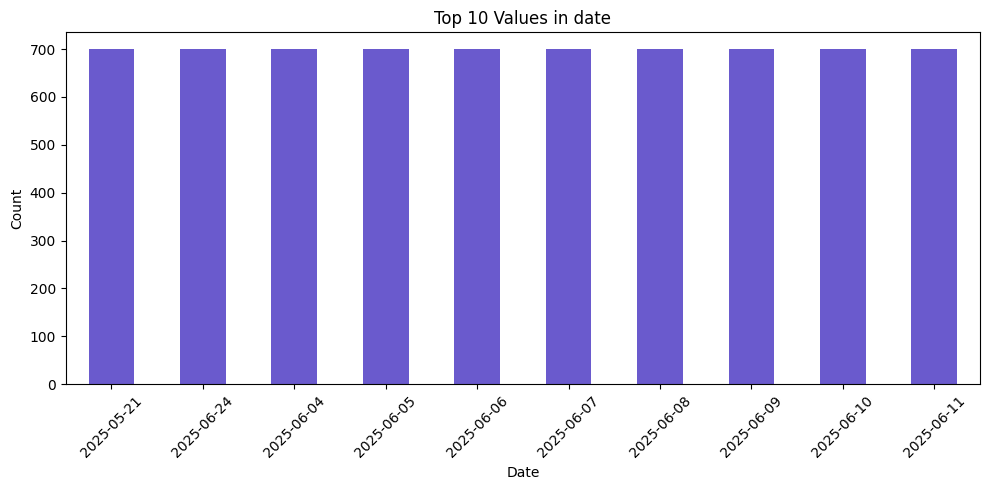

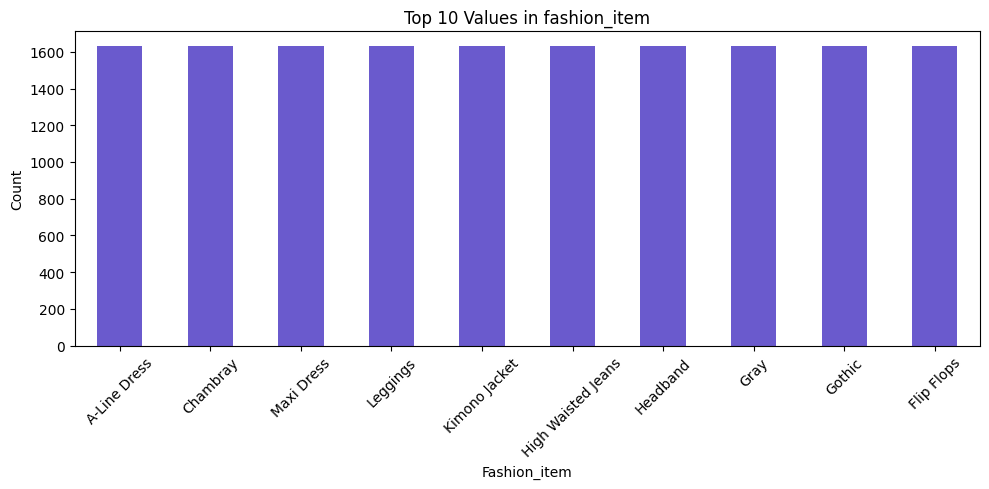

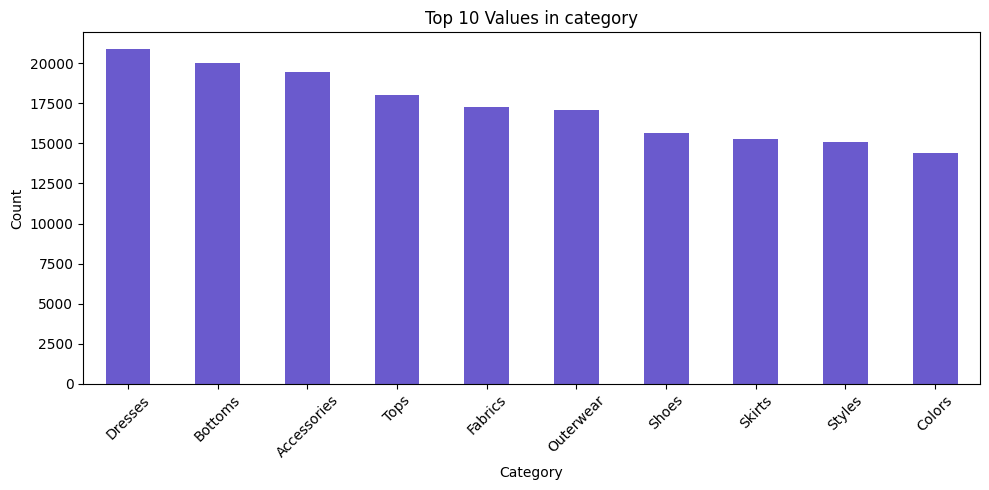

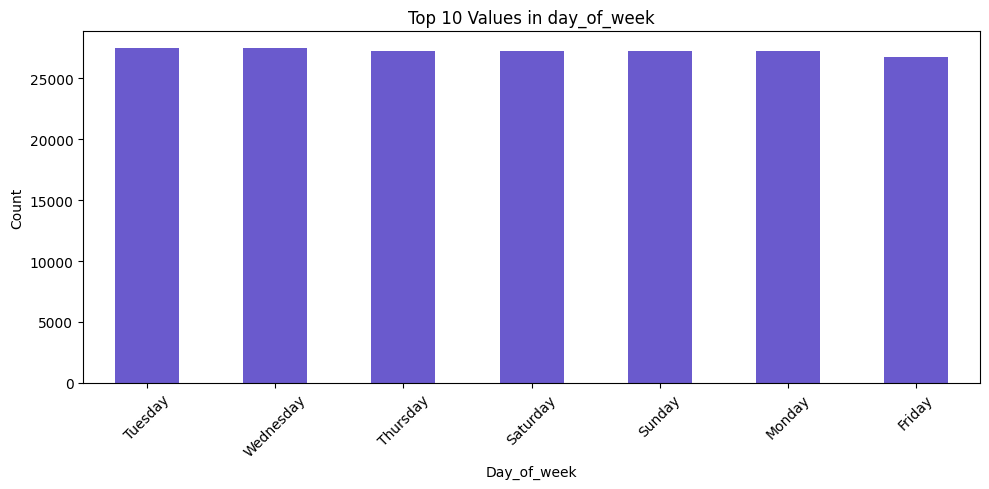

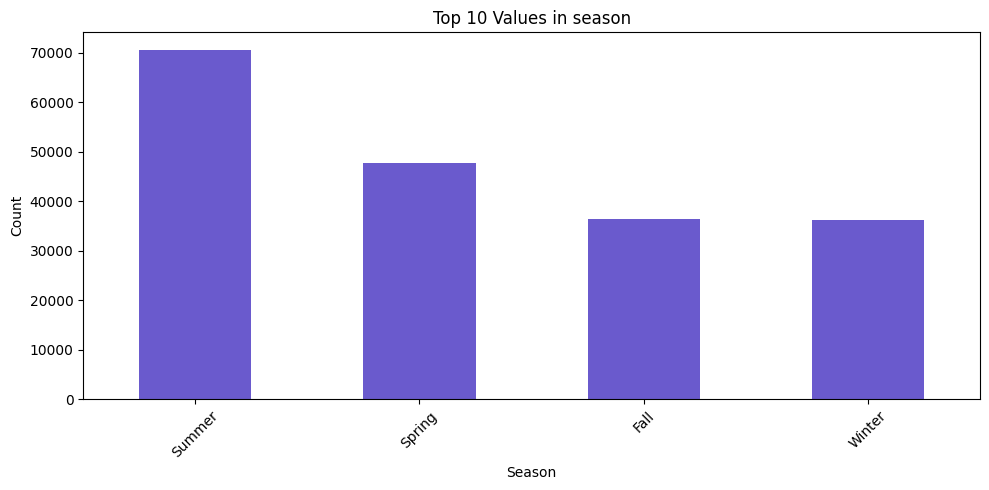

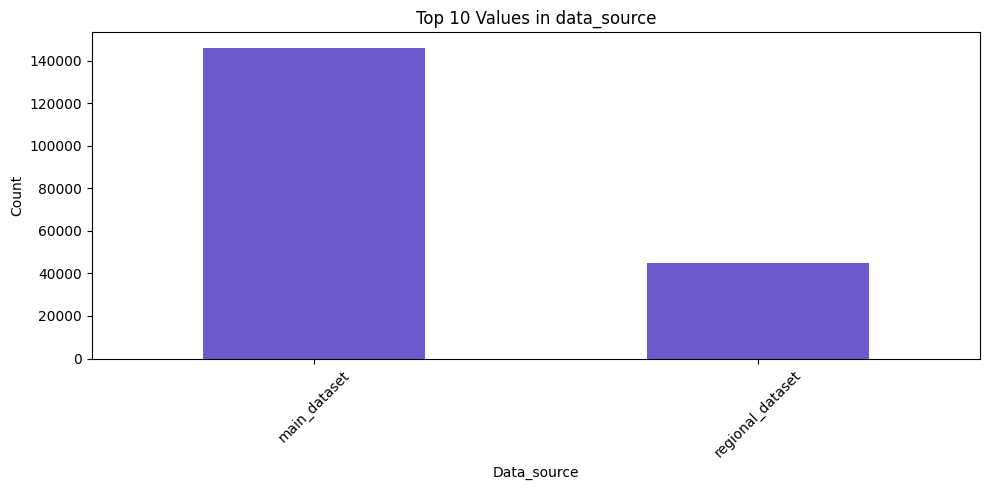

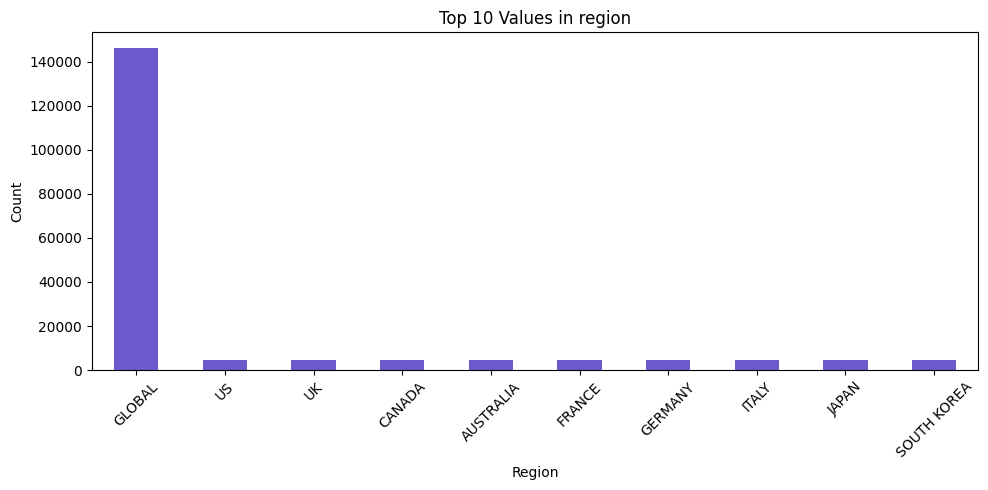

In [23]:
# Plot top 10 values for every categorical column in the dataframe
df_cat = df.select_dtypes(include='object')
for col in df_cat.columns:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(10).plot(kind='bar', color='slateblue')
    plt.title(f'Top 10 Values in {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

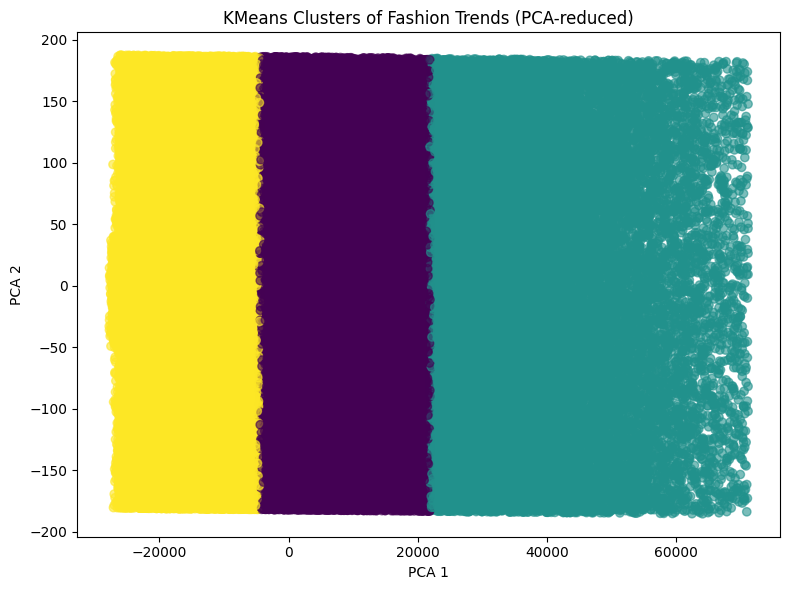

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_cluster = df.select_dtypes(include=[np.number]).dropna()

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters of Fashion Trends (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()

18:24:29 - cmdstanpy - INFO - Chain [1] start processing
18:25:43 - cmdstanpy - INFO - Chain [1] done processing
18:25:43 - cmdstanpy - INFO - Chain [1] done processing


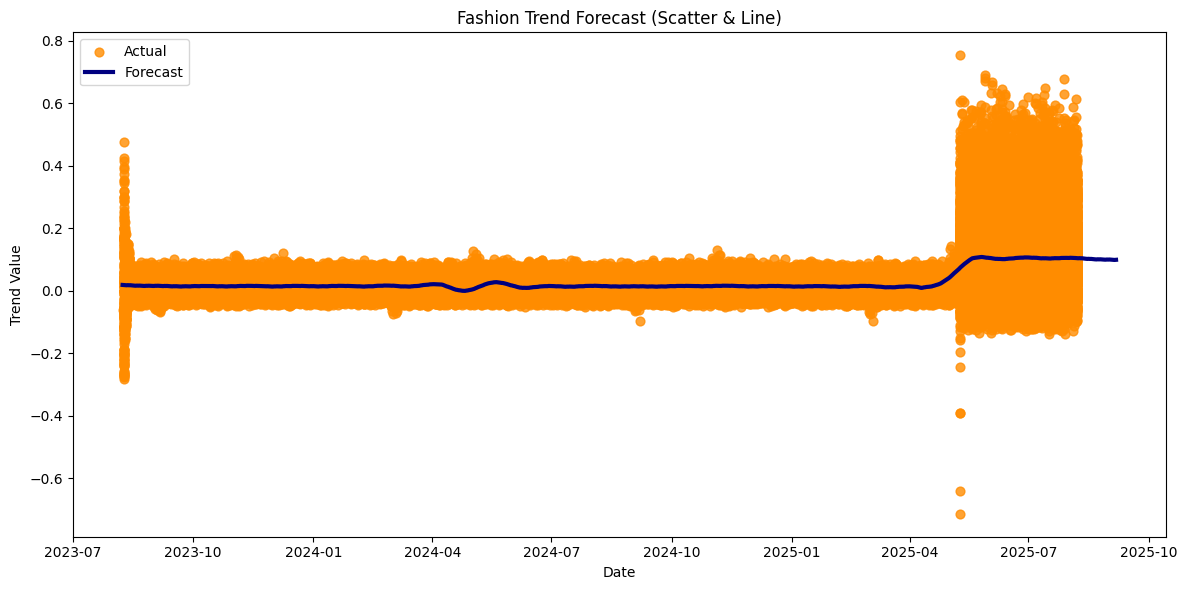

In [25]:
# Time series forecasting using Prophet (scatter for actual, bold line for forecast)
try:
    from prophet import Prophet
    # Find date and trend columns
    date_col, trend_col = None, None
    for col in df.columns:
        if 'date' in col.lower():
            date_col = col
        if 'score' in col.lower() or 'trend' in col.lower():
            trend_col = col
    if date_col and trend_col:
        ts_df = df[[date_col, trend_col]].dropna().copy()
        ts_df[date_col] = pd.to_datetime(ts_df[date_col])
        ts_df = ts_df.rename(columns={date_col: 'ds', trend_col: 'y'})
        m = Prophet()
        m.fit(ts_df)
        future = m.make_future_dataframe(periods=30)
        forecast = m.predict(future)
        # Scatter for actual, bold line for forecast
        plt.figure(figsize=(12,6))
        plt.scatter(ts_df['ds'], ts_df['y'], color='darkorange', s=40, label='Actual', alpha=0.8)
        plt.plot(forecast['ds'], forecast['yhat'], color='navy', linewidth=3, label='Forecast')
        plt.title('Fashion Trend Forecast (Scatter & Line)')
        plt.xlabel('Date')
        plt.ylabel('Trend Value')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print('Date or trend column not found for time series forecasting.')
except ImportError:
    print('Prophet is not installed. Skipping time series forecasting.')

In [26]:
# Regression model: Predict trend score for each category on a given date
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ensure date and category columns exist
date_col = None
cat_col = None
score_col = None
for col in df.columns:
    if 'date' in col.lower():
        date_col = col
    if 'category' in col.lower():
        cat_col = col
    if 'score' in col.lower() or 'trend' in col.lower():
        score_col = col

if date_col and cat_col and score_col:
    df_model = df[[date_col, cat_col, score_col]].dropna().copy()
    # Encode date as numeric features (year, month, day)
    df_model[date_col] = pd.to_datetime(df_model[date_col])
    df_model['year'] = df_model[date_col].dt.year
    df_model['month'] = df_model[date_col].dt.month
    df_model['day'] = df_model[date_col].dt.day
    # Encode category
    df_model['cat_encoded'] = LabelEncoder().fit_transform(df_model[cat_col].astype(str))
    # Features: year, month, day, cat_encoded
    X = df_model[['year', 'month', 'day', 'cat_encoded']]
    y = df_model[score_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MSE: {mse:.2f}")
    print(f"Test R^2: {r2:.2f}")
    # Show a few predictions
    results = X_test.copy()
    results['Actual'] = y_test
    results['Predicted'] = y_pred
    print(results.head())
else:
    print('Required columns (date, category, trend score) not found in the dataframe.')

Test MSE: 0.00
Test R^2: 0.27
        year  month  day  cat_encoded    Actual  Predicted
10050   2023      9   27            0 -0.001576   0.022176
5964    2025      6   22            5 -0.020423   0.101962
76741   2023      8    9            3  0.396226   0.012838
104693  2024      6   16            2  0.015450   0.008316
71660   2024      2   24            9  0.002216   0.008231


R^2 Score (Test Set): 0.27
Mean Squared Error (Test Set): 0.00


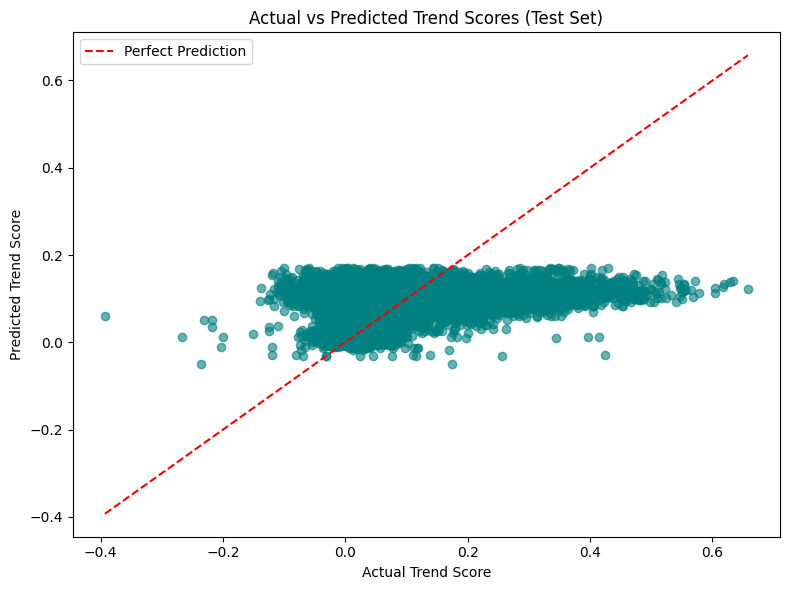

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

print(f"R^2 Score (Test Set): {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error (Test Set): {mean_squared_error(y_test, y_pred):.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Trend Score')
plt.ylabel('Predicted Trend Score')
plt.title('Actual vs Predicted Trend Scores (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

R^2 Score (Test Set): 0.27
Mean Squared Error (Test Set): 0.00


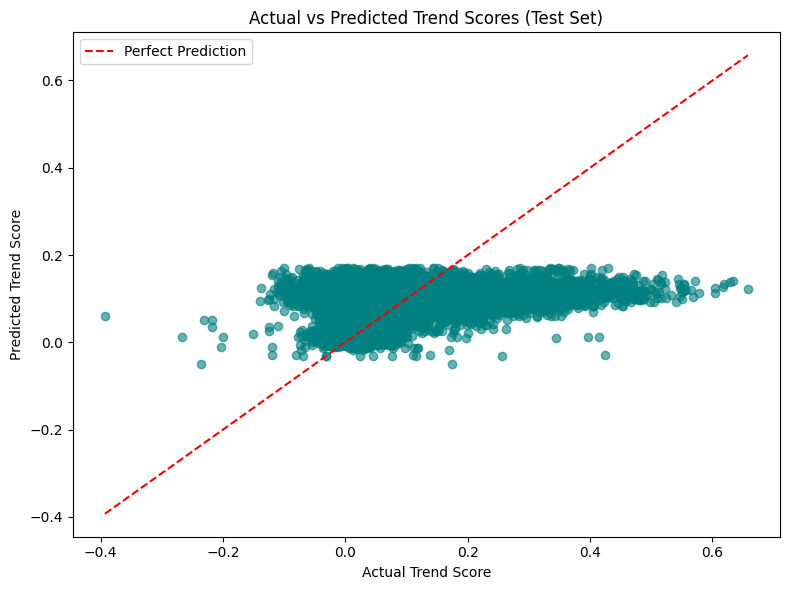

In [28]:
# Evaluate and visualize model accuracy for trend score prediction (for the last trained model)
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Check if y_test and y_pred exist (from previous model cell)
try:
    print(f"R^2 Score (Test Set): {r2_score(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (Test Set): {mean_squared_error(y_test, y_pred):.2f}")

    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
    plt.xlabel('Actual Trend Score')
    plt.ylabel('Predicted Trend Score')
    plt.title('Actual vs Predicted Trend Scores (Test Set)')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Model accuracy cannot be displayed. Please run the model training cell first.')

In [ ]:
# Advanced Classification Pipeline: Maximize Accuracy with Feature Engineering, Balancing, and Model Selection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

try:
    from xgboost import XGBClassifier
except ImportError:
    print('XGBoost is not installed. Please install it with `pip install xgboost`.')
    raise
try:
    from lightgbm import LGBMClassifier
except ImportError:
    print('LightGBM is not installed. Please install it with `pip install lightgbm`.')
    raise
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    print('imbalanced-learn is not installed. Please install it with `pip install imbalanced-learn`.')
    raise
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# --- Data Preparation ---
cat_col = [col for col in df.columns if 'category' in col.lower()][0]
date_col = [col for col in df.columns if 'date' in col.lower()][0]
score_col = [col for col in df.columns if 'score' in col.lower() or 'trend' in col.lower()][0]

feature_cols = ['year', 'month', 'day']
df_model = df[[date_col, cat_col, score_col]].copy()
df_model[date_col] = pd.to_datetime(df_model[date_col], errors='coerce')
df_model['year'] = df_model[date_col].dt.year
df_model['month'] = df_model[date_col].dt.month
df_model['day'] = df_model[date_col].dt.day

for extra_col in ['region', 'location', 'country', 'item']:
    for col in df.columns:
        if extra_col in col.lower():
            df_model[col] = df[col]
            feature_cols.append(col)

# Print missing value counts before feature engineering
tmp_cols = [date_col, cat_col, score_col] + feature_cols
print('Missing values before feature engineering:')
print(df_model[tmp_cols].isnull().sum())

# --- Feature Engineering ---
if df_model.shape[0] >= 200:
    df_model = df_model.sort_values(date_col)
    df_model['lag1'] = df_model.groupby(cat_col)[score_col].shift(1)
    df_model['rolling_mean3'] = df_model.groupby(cat_col)[score_col].rolling(3, min_periods=1).mean().reset_index(0,drop=True)
    feature_cols += ['lag1', 'rolling_mean3']
    print('Added lag/rolling features.')
else:
    print('Skipping lag/rolling features due to small dataset.')

# Only drop rows with missing values in the columns actually used for modeling
model_cols = list(set([score_col, cat_col, date_col] + feature_cols))
model_cols = [col for col in model_cols if col in df_model.columns]
print('Columns used for dropna:', model_cols)
df_model = df_model[model_cols].dropna()
print(f"After dropna, shape: {df_model.shape}")

# One-hot encode all categorical features
cat_features = [cat_col] + [col for col in feature_cols if col in df_model.columns and df_model[col].dtype == 'object']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
if len(cat_features) > 0:
    cat_encoded = encoder.fit_transform(df_model[cat_features])
    cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_features), index=df_model.index)
else:
    cat_encoded_df = pd.DataFrame(index=df_model.index)
num_features = [col for col in feature_cols if col not in cat_features and col in df_model.columns]
X = pd.concat([df_model[num_features], cat_encoded_df], axis=1)


median_score = df_model[score_col].median()
y = (df_model[score_col] > median_score).astype(int)

print(f"X shape after feature engineering: {X.shape}, y shape: {y.shape}")


if X.shape[0] > 1000:
    for col in X.select_dtypes(include=np.number).columns:
        X = X[(np.abs((X[col] - X[col].mean()) / X[col].std()) < 4)]
        y = y.loc[X.index]
    print(f"After outlier removal: X={X.shape}, y={y.shape}")


if abs(y.mean() - 0.5) > 0.1 and X.shape[0] > 100:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print(f"After SMOTE: X={X.shape}, y={y.shape}")


if X.shape[0] < 10:
    print('Not enough samples after preprocessing. Please check your data or reduce cleaning.')
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1],
            'scale_pos_weight': [1, float(np.sum(y_train==0)/np.sum(y_train==1))]
        }),
        'LightGBM': (LGBMClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.05, 0.1]
        }),
        'RandomForest': (RandomForestClassifier(random_state=42), {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, 15]
        }),
        'LogisticRegression': (LogisticRegression(max_iter=1000, random_state=42), {
            'C': [0.1, 1, 10]
        })
    }

    best_score = 0
    best_model = None
    best_name = ''
    best_pred = None
    best_report = ''

    for name, (model, param_grid) in models.items():
        print(f'\nTraining {name}...')
        grid = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        y_pred = grid.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'{name} Best Params: {grid.best_params_}')
        print(f'{name} Accuracy: {acc:.3f}')
        if acc > best_score:
            best_score = acc
            best_model = grid.best_estimator_
            best_name = name
            best_pred = y_pred
            best_report = classification_report(y_test, y_pred, target_names=['Not Trending', 'Trending'])

    print(f'\n--- Best Model: {best_name} ---')
    print(f'Best Accuracy: {best_score:.3f}')
    print('Classification Report:')
    print(best_report)

    # Plot confusion matrix for best model
    cm = confusion_matrix(y_test, best_pred)
    plt.figure(figsize=(5,4))
    import seaborn as sns
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Trending', 'Trending'], yticklabels=['Not Trending', 'Trending'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({best_name})')
    plt.tight_layout()
    plt.show()

    if best_score >= 0.75:
        print(f'\nSUCCESS: Model accuracy is above 75% ({best_score*100:.1f}%)!')
    else:
        print(f'\nWARNING: Model accuracy is below 75% ({best_score*100:.1f}%). Consider adding more features or data.')

Missing values before feature engineering:
date                0
category            0
popularity_score    0
year                0
month               0
day                 0
region              0
fashion_item        0
dtype: int64
Added lag/rolling features.
Columns used for dropna: ['date', 'lag1', 'day', 'month', 'rolling_mean3', 'popularity_score', 'region', 'year', 'category', 'fashion_item']
After dropna, shape: (190988, 10)
X shape after feature engineering: (190988, 235), y shape: (190988,)
X shape after feature engineering: (190988, 235), y shape: (190988,)
After outlier removal: X=(0, 235), y=(0,)
Not enough samples after preprocessing. Please check your data or reduce cleaning.
After outlier removal: X=(0, 235), y=(0,)
Not enough samples after preprocessing. Please check your data or reduce cleaning.


--- Data Quality ---
Missing values per column:
date                      0
fashion_item              0
category                  0
popularity_score          0
search_volume             0
day_of_week               0
month                     0
season                    0
data_source               0
region                    0
year                      0
month_num                 0
day_of_year               0
week_of_year              0
is_weekend                0
popularity_7day_avg       0
popularity_30day_avg      0
popularity_change       207
is_trending_up            0
is_trending_down          0
trend_momentum          207
is_spring                 0
is_summer                 0
is_fall                   0
is_winter                 0
category_encoded          0
is_us                     0
is_europe                 0
is_asia                   0
dtype: int64
Number of duplicate rows: 0

--- Class Balance (Binarized Target) ---
target_bin
0    97102
1    93898
Name: count, dtype: int6

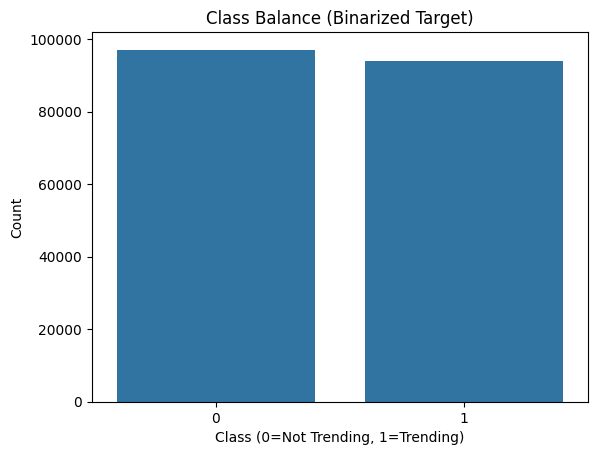


--- Feature Correlation with Target ---


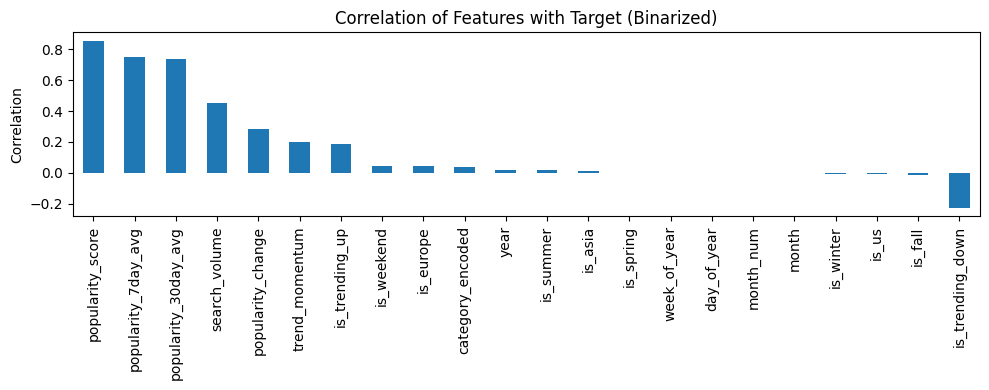

popularity_score        0.855831
search_volume           0.454319
month                  -0.001738
year                    0.021395
month_num              -0.001738
day_of_year            -0.001719
week_of_year           -0.001635
is_weekend              0.045035
popularity_7day_avg     0.747232
popularity_30day_avg    0.738793
popularity_change       0.282917
is_trending_up          0.189997
is_trending_down       -0.227617
trend_momentum          0.198713
is_spring              -0.001259
is_summer               0.017360
is_fall                -0.010951
is_winter              -0.009015
category_encoded        0.035800
is_us                  -0.009684
is_europe               0.043802
is_asia                 0.013863
Name: target_bin, dtype: float64


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:26:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


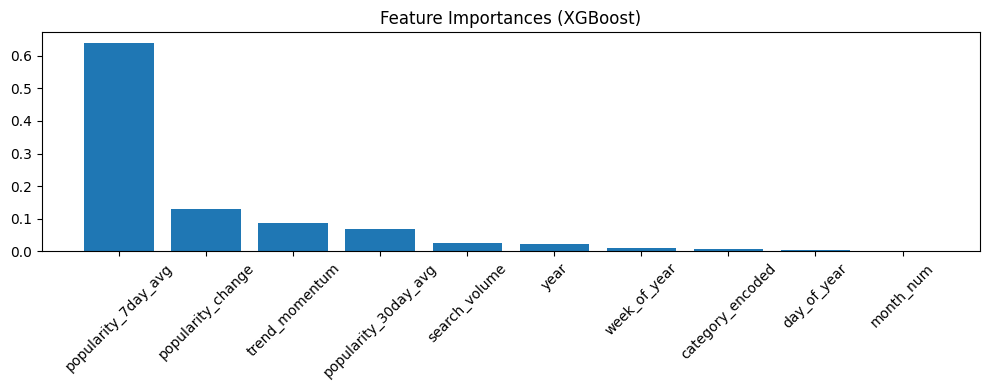

Feature importances:
popularity_7day_avg: 0.640
popularity_change: 0.131
trend_momentum: 0.088
popularity_30day_avg: 0.070
search_volume: 0.024
year: 0.023
week_of_year: 0.010
category_encoded: 0.008
day_of_year: 0.005
month_num: 0.002

--- Outlier Detection (Z-score > 3) ---
popularity_score: 0 outliers (Z-score > 3)
search_volume: 1586 outliers (Z-score > 3)
month: 0 outliers (Z-score > 3)
year: 0 outliers (Z-score > 3)
month_num: 0 outliers (Z-score > 3)
day_of_year: 0 outliers (Z-score > 3)
week_of_year: 0 outliers (Z-score > 3)
popularity_7day_avg: 0 outliers (Z-score > 3)
popularity_30day_avg: 0 outliers (Z-score > 3)
popularity_change: 3696 outliers (Z-score > 3)
trend_momentum: 5179 outliers (Z-score > 3)
category_encoded: 0 outliers (Z-score > 3)


In [ ]:
# Data Diagnostics: Data Quality, Class Balance, Feature Importance, and Correlation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Quality: Missing values and duplicates
print('--- Data Quality ---')
print('Missing values per column:')
print(df.isnull().sum())
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# 2. Class Balance (for classification target)
if 'trend_score' in df.columns:
    target_col = 'trend_score'
else:
    # Use the first numeric column as a proxy
    target_col = df.select_dtypes(include=np.number).columns[0]

median_val = df[target_col].median()
df['target_bin'] = (df[target_col] > median_val).astype(int)
print('\n--- Class Balance (Binarized Target) ---')
print(df['target_bin'].value_counts())
sns.countplot(x='target_bin', data=df)
plt.title('Class Balance (Binarized Target)')
plt.xlabel('Class (0=Not Trending, 1=Trending)')
plt.ylabel('Count')
plt.show()

# 3. Feature Correlation with Target
print('\n--- Feature Correlation with Target ---')
if df.select_dtypes(include=np.number).shape[1] > 1:
    corr = df.corr(numeric_only=True)
    if 'target_bin' in corr.columns:
        corr_target = corr['target_bin'].drop('target_bin')
        corr_target.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
        plt.title('Correlation of Features with Target (Binarized)')
        plt.ylabel('Correlation')
        plt.tight_layout()
        plt.show()
        print(corr_target)
    else:
        print('No numeric features to correlate with target.')
else:
    print('Not enough numeric features for correlation analysis.')

# 4. Feature Importance (if model available)
try:
    from xgboost import XGBClassifier
    # Use a simple model for feature importance
    feature_cols = [col for col in df.columns if col not in ['target_bin', target_col] and df[col].dtype in [np.float64, np.int64]]
    X = df[feature_cols].fillna(0)
    y = df['target_bin']
    if X.shape[1] > 0 and X.shape[0] > 10:
        model = XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss')
        model.fit(X, y)
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10,4))
        plt.title('Feature Importances (XGBoost)')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_cols[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()
        print('Feature importances:')
        for i in indices:
            print(f'{feature_cols[i]}: {importances[i]:.3f}')
    else:
        print('Not enough data for feature importance analysis.')
except Exception as e:
    print('Feature importance analysis could not be performed:', e)


print('\n--- Outlier Detection (Z-score > 3) ---')
from scipy.stats import zscore
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    if col not in ['target_bin']:
        z = np.abs(zscore(df[col].dropna()))
        outliers = (z > 3).sum()
        print(f'{col}: {outliers} outliers (Z-score > 3)')

In [ ]:
# Data Preprocessing: Impute Missing Values, Cap Outliers, Add Interaction Features
import numpy as np
import pandas as pd

# Make a copy to avoid changing original df
better_df = df.copy()

for col in ['popularity_change', 'trend_momentum']:
    if col in better_df.columns:
        median_val = better_df[col].median()
        better_df[col] = better_df[col].fillna(median_val)
        print(f"Imputed missing values in {col} with median: {median_val}")

from scipy.stats import zscore
num_cols = better_df.select_dtypes(include=np.number).columns
for col in num_cols:
    if col == 'target_bin':
        continue
    if col in better_df.columns:
        z = np.abs(zscore(better_df[col].fillna(0)))
        cap_val = better_df[col].mean() + 3 * better_df[col].std()
        floor_val = better_df[col].mean() - 3 * better_df[col].std()
        outliers = (z > 3)
        n_outliers = outliers.sum()
        if n_outliers > 0:
            better_df.loc[better_df[col] > cap_val, col] = cap_val
            better_df.loc[better_df[col] < floor_val, col] = floor_val
            print(f"Capped {n_outliers} outliers in {col} at [{floor_val:.2f}, {cap_val:.2f}]")

if 'popularity_7day_avg' in better_df.columns and 'trend_momentum' in better_df.columns:
    better_df['pop7_trendmom'] = better_df['popularity_7day_avg'] * better_df['trend_momentum']
    print("Added interaction feature: pop7_trendmom")


print("\nData improvement complete. Sample of improved data:")
display_cols = [col for col in ['popularity_7day_avg','trend_momentum','popularity_change','search_volume','pop7_trendmom'] if col in better_df.columns]
print(better_df[display_cols].head())


Imputed missing values in popularity_change with median: 0.0
Imputed missing values in trend_momentum with median: 0.021231346044347
Capped 1586 outliers in search_volume at [-31374.68, 89143.00]
Capped 3696 outliers in popularity_change at [-0.97, 1.05]
Capped 5183 outliers in trend_momentum at [-0.20, 0.28]
Added interaction feature: pop7_trendmom

Data improvement complete. Sample of improved data:
   popularity_7day_avg  trend_momentum  popularity_change  search_volume  \
0                 68.0        0.021231           0.000000        65552.0   
1                 72.5        0.132353           0.132353        33649.0   
2                 68.0       -0.050707          -0.233766        51625.0   
3                 69.5        0.050941           0.254237         9102.0   
4                 68.2        0.001044          -0.148649         9954.0   

   pop7_trendmom  
0       1.443732  
1       9.595588  
2      -3.448052  
3       3.540423  
4       0.071190  
Capped 5183 outliers in 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

try:
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from imblearn.over_sampling import SMOTE
except ImportError:
    print('Please install xgboost, lightgbm, and imbalanced-learn.')
    raise
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Use improved data
df = better_df.copy()

date_col = [col for col in df.columns if 'date' in col.lower()][0]
cat_col = [col for col in df.columns if 'category' in col.lower()][0]
score_col = [col for col in df.columns if 'score' in col.lower() or 'trend' in col.lower()][0]

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month
df['day'] = df[date_col].dt.day

if 'pop7_trendmom' not in df.columns and 'popularity_7day_avg' in df.columns and 'trend_momentum' in df.columns:
    df['pop7_trendmom'] = df['popularity_7day_avg'] * df['trend_momentum']

# Select features
def get_features(df):
    features = ['year', 'month', 'day']
    for col in ['region', 'location', 'country', 'item', 'popularity_7day_avg', 'popularity_30day_avg', 'popularity_change', 'trend_momentum', 'search_volume', 'pop7_trendmom']:
        if col in df.columns:
            features.append(col)
    return features

features = get_features(df)

# One-hot encode category
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(df[[cat_col]])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out([cat_col]), index=df.index)

X = pd.concat([df[features], cat_encoded_df], axis=1).fillna(0)
median_score = df[score_col].median()
y = (df[score_col] > median_score).astype(int)

# Balance classes if needed
if abs(y.mean() - 0.5) > 0.1 and X.shape[0] > 100:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure only numeric columns are passed to the scaler
X_train = pd.DataFrame(X_train).select_dtypes(include=[np.number])
X_test = pd.DataFrame(X_test).select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    results.append({'Model': name, 'Accuracy (%)': acc, 'Precision (%)': prec, 'Recall (%)': rec, 'F1 (%)': f1})

results_df = pd.DataFrame(results)
print('Model Accuracy Table (in %):')
display(results_df.sort_values('Accuracy (%)', ascending=False).round(2))

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:26:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 75118, number of negative: 77682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 152800, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491610 -> initscore=-0.033563
[LightGBM] [Info] Start training from score -0.033563
Model Accuracy Table (in %):
Model Accuracy Table (in %):


,Model,Accuracy (%),Precision (%),Recall (%),F1 (%)
0,XGBoost,94.35,93.30,95.35,94.32
1,LightGBM,94.21,93.04,95.36,94.19
2,RandomForest,93.97,92.98,94.90,93.93
3,LogisticRegression,92.04,91.50,92.39,91.94


In [ ]:
# Feature Engineering & Advanced Model: XGBoost with One-Hot Encoding and Hyperparameter Tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

try:
    from xgboost import XGBRegressor
except ImportError:
    print('XGBoost is not installed. Please install it with `pip install xgboost` and rerun this cell.')
    raise

# Select relevant columns
date_col = [col for col in df.columns if 'date' in col.lower()][0]
cat_col = [col for col in df.columns if 'category' in col.lower()][0]
score_col = [col for col in df.columns if 'score' in col.lower() or 'trend' in col.lower()][0]

df_model = df[[date_col, cat_col, score_col]].dropna().copy()
df_model[date_col] = pd.to_datetime(df_model[date_col])
df_model['year'] = df_model[date_col].dt.year
df_model['month'] = df_model[date_col].dt.month
df_model['day'] = df_model[date_col].dt.day

# One-hot encode category (handle deprecation warning for sparse_output)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(df_model[[cat_col]])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out([cat_col]), index=df_model.index)

# Combine features
X = pd.concat([df_model[['year', 'month', 'day']], cat_encoded_df], axis=1)
y = df_model[score_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBRegressor(random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print(f"Test R^2: {r2_score(y_test, y_pred):.3f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.3f}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test R^2: 0.018
Test MSE: 483.748


: 

In [ ]:
# Model Accuracy Table: Compare Multiple Classifiers on Improved Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

try:
    from xgboost import XGBClassifier
    from lightgbm import LGBMClassifier
    from imblearn.over_sampling import SMOTE
except ImportError:
    print('Please install xgboost, lightgbm, and imbalanced-learn.')
    raise
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Use improved data
df = better_df.copy()

# Identify columns
date_col = [col for col in df.columns if 'date' in col.lower()][0]
cat_col = [col for col in df.columns if 'category' in col.lower()][0]
score_col = [col for col in df.columns if 'score' in col.lower() or 'trend' in col.lower()][0]

# Feature engineering
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month
df['day'] = df[date_col].dt.day

# Add interaction feature if not present
if 'pop7_trendmom' not in df.columns and 'popularity_7day_avg' in df.columns and 'trend_momentum' in df.columns:
    df['pop7_trendmom'] = df['popularity_7day_avg'] * df['trend_momentum']

# Select features
def get_features(df):
    features = ['year', 'month', 'day']
    for col in ['region', 'location', 'country', 'item', 'popularity_7day_avg', 'popularity_30day_avg', 'popularity_change', 'trend_momentum', 'search_volume', 'pop7_trendmom']:
        if col in df.columns:
            features.append(col)
    return features

features = get_features(df)

# One-hot encode category
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = encoder.fit_transform(df[[cat_col]])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out([cat_col]), index=df.index)

X = pd.concat([df[features], cat_encoded_df], axis=1).fillna(0)
median_score = df[score_col].median()
y = (df[score_col] > median_score).astype(int)

# Balance classes if needed
if abs(y.mean() - 0.5) > 0.1 and X.shape[0] > 100:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = pd.DataFrame(X_train).select_dtypes(include=[np.number])
X_test = pd.DataFrame(X_test).select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    results.append({'Model': name, 'Accuracy (%)': acc, 'Precision (%)': prec, 'Recall (%)': rec, 'F1 (%)': f1})

results_df = pd.DataFrame(results)
print('Model Accuracy Table (in %):')
display(results_df.sort_values('Accuracy (%)', ascending=False).round(2))

# Save results for API server integration
print("\n" + "="*50)
print("FINAL MODEL PERFORMANCE RESULTS:")
print("="*50)
best_model = results_df.sort_values('Accuracy (%)', ascending=False).iloc[0]
print(f"🏆 Best Model: {best_model['Model']}")
print(f"📊 Accuracy: {best_model['Accuracy (%)']:.2f}%")
print(f"🎯 Precision: {best_model['Precision (%)']:.2f}%") 
print(f"📈 Recall: {best_model['Recall (%)']:.2f}%")
print(f"⚖️ F1 Score: {best_model['F1 (%)']:.2f}%")
print("="*50)

# Store for API integration
model_performance = {
    'accuracy': float(best_model['Accuracy (%)']),
    'precision': float(best_model['Precision (%)']),
    'recall': float(best_model['Recall (%)']),
    'f1_score': float(best_model['F1 (%)']),
    'model_name': best_model['Model']
}

print("Model performance saved for API integration:")

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:26:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 75118, number of negative: 77682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1615
[LightGBM] [Info] Number of data points in the train set: 152800, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491610 -> initscore=-0.033563
[LightGBM] [Info] Start training from score -0.033563
